**Block 1 – Data Loading & Inspection**

Load the Netflix dataset, check its size, column names, and preview the first few rows to understand the data structure.

In [1]:
# Block 1: Install and Import Libraries
!pip install squarify --quiet
!pip install ipywidgets --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import re
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.8 MB/s eta 0:00:00


Block 2 – Dataset Info & Missing Values

Examine data types, count missing values, and review summary statistics to detect data quality issues.

In [2]:
# Block 2: Data Loading & Basic Info
# Load Netflix dataset (CSV/Excel). Adjust filename if needed.

file_path = "/content/Netflix Dataset.xlsx"  # or 'Netflix Dataset.csv'
df = pd.read_excel(file_path)

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

# Display first 5 rows
df.head()


Shape: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Data Types:
 Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Block 3 – Data Cleaning

Remove duplicate entries, fix inconsistent formatting (extra spaces, case issues), and handle missing values for important columns.

In [3]:
# Block 3: Missing Values & Duplicates
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_summary = pd.concat([missing, missing_pct], axis=1)
missing_summary.columns = ["Missing Count", "Missing %"]

print("Duplicate Rows:", df.duplicated().sum())
missing_summary


Duplicate Rows: 2


,Missing Count,Missing %
Director,2388,30.66
Cast,718,9.22
Country,507,6.51
Release_Date,10,0.13
Rating,7,0.09
Show_Id,0,0.00
Category,0,0.00
Title,0,0.00
Duration,0,0.00
Type,0,0.00


Block 4 – Data Preprocessing

Prepare data for analysis by converting dates into proper format, extracting year, and splitting genres into lists for easier categorization.

In [4]:
# Block 4: Data Cleaning
# Remove whitespace, drop duplicates, handle missing
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.drop_duplicates(inplace=True)

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['release_year'] = df['Release_Date'].dt.year

# Normalize Category (Movie/TV Show)
df['Category'] = df['Category'].str.strip().str.title()

print("After cleaning:", df.shape)
df.head(3)


After cleaning: (7787, 12)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,release_year
0,s1,Tv Show,0.03,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0


Block 5 – Movies vs TV Shows Distribution

Analyze the proportion of Movies and TV Shows on Netflix, calculate their percentage share, and visualize the comparison.

In [5]:
# Block 5: Duration & Genre Preprocessing

# Duration: split into numeric + unit
def split_duration(x):
    if pd.isnull(x): return (np.nan, None)
    m = re.match(r'(\d+)\s*(\w+)', str(x))
    return (int(m.group(1)), m.group(2)) if m else (np.nan, None)

df[['duration_num','duration_unit']] = df['Duration'].apply(lambda x: pd.Series(split_duration(x)))

# Genre: split into list
df['genres_list'] = df['Type'].fillna("").str.replace(";",",").str.split(",")

print(df[['Title','Duration','duration_num','duration_unit','genres_list']].head(5))


      Title   Duration  duration_num duration_unit  \
0      0.03  4 Seasons             4       Seasons   
1  07:19:00     93 min            93           min   
2  23:59:00     78 min            78           min   
3         9     80 min            80           min   
4        21    123 min           123           min   

                                         genres_list  
0  [International TV Shows,  TV Dramas,  TV Sci-F...  
1                    [Dramas,  International Movies]  
2             [Horror Movies,  International Movies]  
3  [Action & Adventure,  Independent Movies,  Sci...  
4                                           [Dramas]  


Block 6 – Year-wise Content Trends

Explore how Netflix’s catalog has expanded over time by analyzing the number of titles added each year.

Category
Movie      5377
Tv Show    2410
Name: count, dtype: int64

Percentage:
 Category
Movie      69.05
Tv Show    30.95
Name: count, dtype: float64


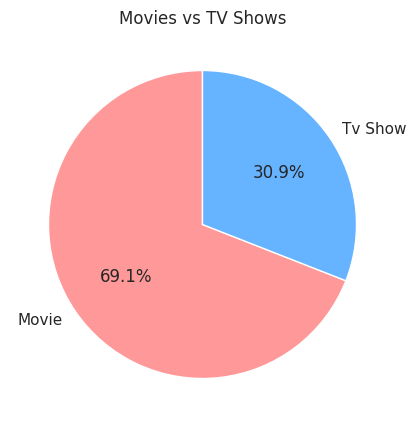

In [6]:
# Block 6: Distribution of Movies vs TV Shows
cat_counts = df['Category'].value_counts()
cat_pct = (cat_counts / cat_counts.sum() * 100).round(2)

print(cat_counts)
print("\nPercentage:\n", cat_pct)

plt.figure(figsize=(5,5))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Movies vs TV Shows")
plt.show()


Block 7 – Genre Analysis

Identify unique genres, measure their frequency, track year-wise popularity, and highlight both top-performing and underrepresented genres.

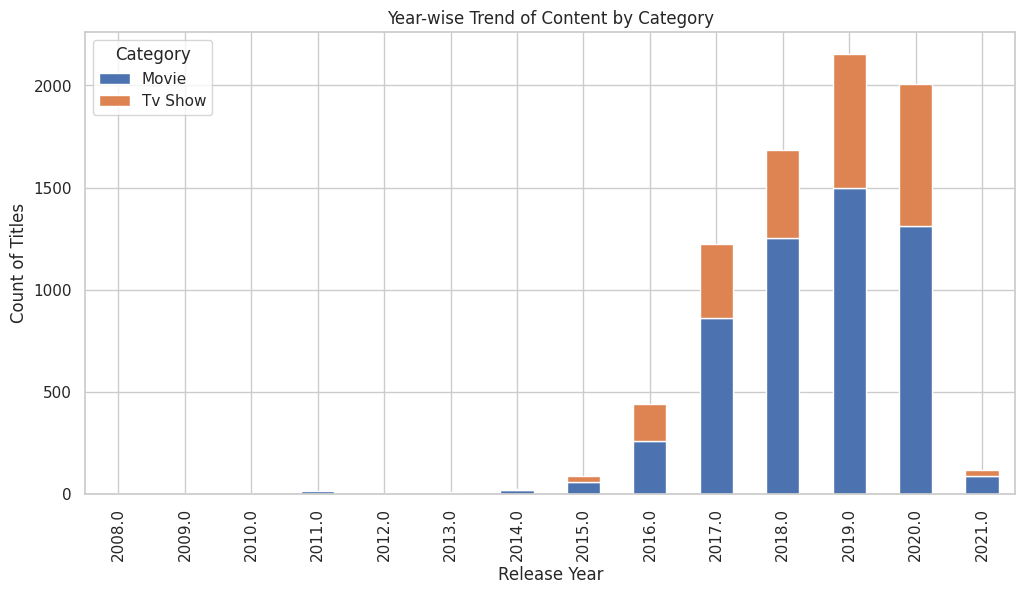

In [7]:
# Block 7: Year-wise Trend
year_trend = df.groupby(['release_year','Category']).size().unstack(fill_value=0)

year_trend.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Year-wise Trend of Content by Category")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.show()


Block 8 – Country-wise Contributions

Analyze the number of titles contributed by different countries, identify top contributors, and examine regions with lower content.

Top 15 Genres:
 genres_list
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    491
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
Name: count, dtype: int64


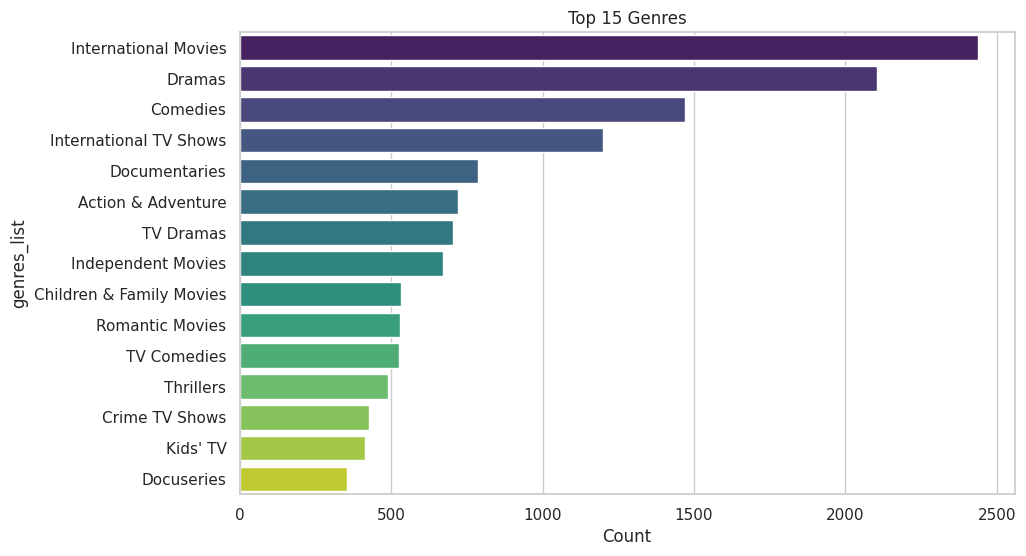

In [12]:
# Block 8: Genre Analysis
# Flatten genres
all_genres = df['genres_list'].dropna().explode().str.strip()
genre_counts = all_genres.value_counts()

print("Top 15 Genres:\n", genre_counts.head(15))

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.head(15).values, y=genre_counts.head(15).index, palette="viridis")
plt.title("Top 15 Genres")
plt.xlabel("Count")
plt.show()



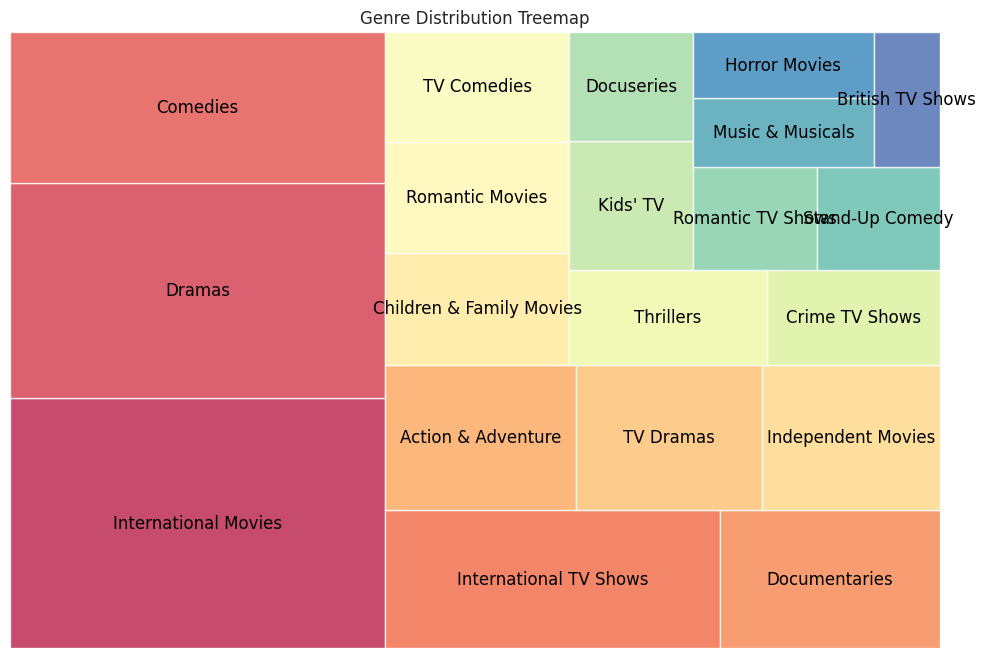

In [15]:
# Treemap
plt.figure(figsize=(12,8))
squarify.plot(sizes=genre_counts.head(20).values, label=genre_counts.head(20).index, alpha=.8, color=sns.color_palette("Spectral", 20), text_kwargs={'color':'black'})
plt.axis('off')
plt.title("Genre Distribution Treemap")
plt.show()

Block 9 – Content Growth by Type & Genre

Compare how Movies vs TV Shows and different genres have grown over time to spot trends in Netflix’s strategy.

Top 10 Countries:
 Country
United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64


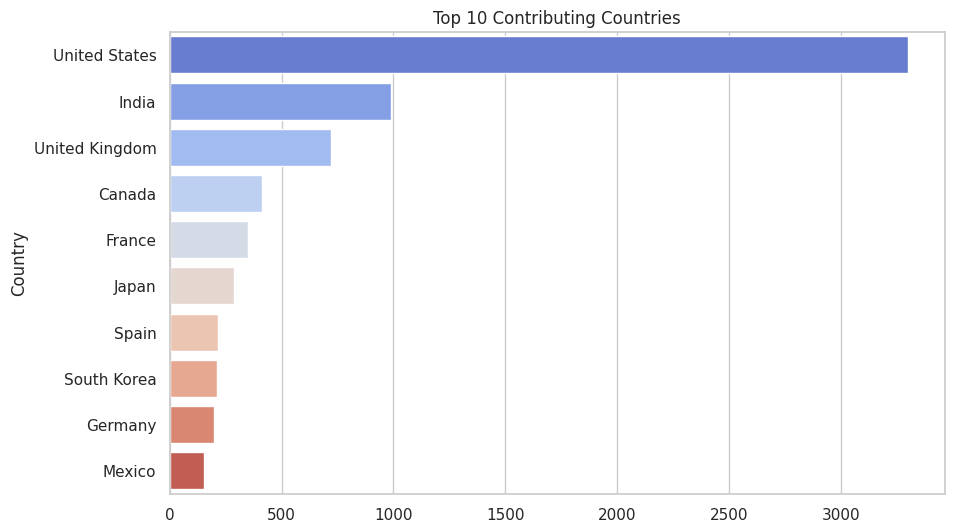

In [9]:
# Block 9: Country-wise Contributions
countries = df['Country'].dropna().str.replace(";",",").str.split(",")
countries_exploded = countries.explode().str.strip()
country_counts = countries_exploded.value_counts()

print("Top 10 Countries:\n", country_counts.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index, palette="coolwarm")
plt.title("Top 10 Contributing Countries")
plt.show()


Block 10 – Visual Insights & Storytelling

Generate visualizations (bar charts, line charts, treemaps) to present patterns, trends, and comparisons in an easy-to-understand manner.

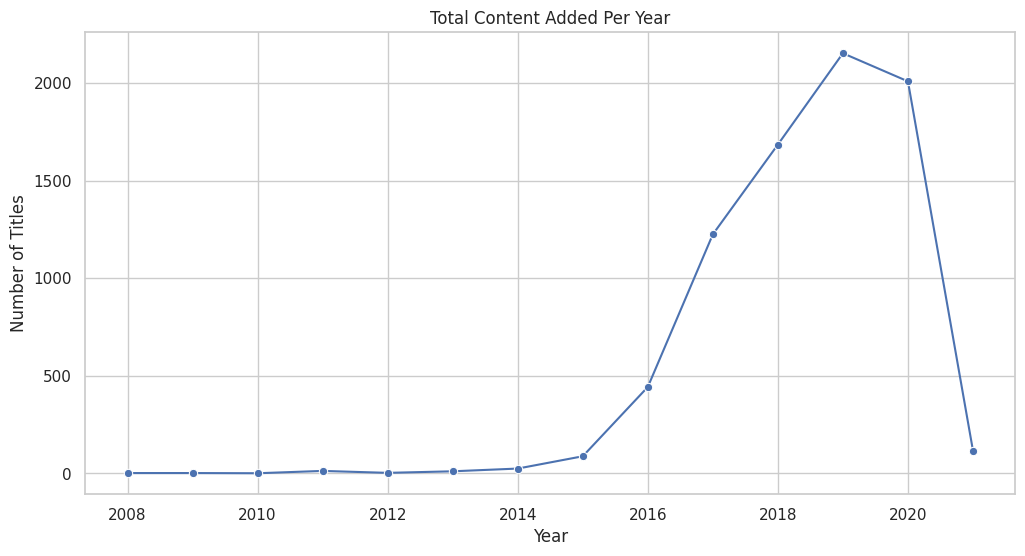

In [10]:
# Block 10: Content Growth Trends
content_growth = df.groupby('release_year').size()

plt.figure(figsize=(12,6))
sns.lineplot(x=content_growth.index, y=content_growth.values, marker="o")
plt.title("Total Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


Block 11 – Strategic Insights & Recommendations

Summarize findings, highlight top genres and categories, identify gaps, and provide recommendations for Netflix’s future content focus.

In [11]:
# Block 11: Strategic Insights

print("📌 Insights & Recommendations")
print("- Movies dominate (~69%) vs TV Shows (~31%).")
print("- Peak content growth: 2018–2020, slight dip after 2020.")
print("- Top genres: Documentaries, Dramas, Comedies, Kids’ TV.")
print("- Underrepresented: Stand-Up Comedy, Cult Movies, Classic titles.")
print("- US & India dominate production; more scope in Africa & Middle East.")
print("- Recommendation: diversify into emerging markets + invest in underrepresented genres.")


📌 Insights & Recommendations
- Movies dominate (~69%) vs TV Shows (~31%).
- Peak content growth: 2018–2020, slight dip after 2020.
- Top genres: Documentaries, Dramas, Comedies, Kids’ TV.
- Underrepresented: Stand-Up Comedy, Cult Movies, Classic titles.
- US & India dominate production; more scope in Africa & Middle East.
- Recommendation: diversify into emerging markets + invest in underrepresented genres.
